In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas 
import cv2
from scipy import interpolate
import os

SETTINGS

In [5]:
user = 13
eyenum = 1
version = "eros_full_cut"
formtype = ".eps"
save = False

f_error = open("/home/yvullers/Documents/Yvonne/error/error_" + version + ".txt", "a")
f_time = open("/home/yvullers/Documents/Yvonne/frequency/frequency_" + version + ".txt", "a")

read files for 1 setting, ground truth and roberta's error

In [274]:
file = "/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/{vers}/center_{usernum}_{eye}.csv".format(usernum = user, eye = eyenum, vers = version)
ground_truth = "/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/ground_truth_{usernum}_{eye}.csv".format(usernum = user, eye = eyenum)
roberta = "/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/user{usernum}_{eye}.txt".format(usernum = user, eye = eyenum)
filefc = "/home/yvullers/Documents/Yvonne/CenterData/User5/0/eros_full_cut/center_5_0.csv"

df_center = pandas.read_csv(file, sep='\s+', header=None)
df_gt = pandas.read_csv(ground_truth, sep='\s+', header=None)
df_roberta = pandas.read_csv(roberta, sep='\s+', header=None)
df_fc = pandas.read_csv(filefc, sep='\s+', header=None)

center = df_center.to_numpy()
gt = df_gt.to_numpy()
center_roberta = df_roberta.to_numpy()
best = df_fc.to_numpy()

CENTER CALCULATION

In [275]:
gt_x = (gt[:,1]+gt[:,3])/2
gt_y = (gt[:,2]+gt[:,4])/2

# temp_x = (center[:,1]+center[:,3])/2
# temp_y = (center[:,2]+center[:,4])/2
temp_x = (center[:,6])
temp_y = (center[:,7])

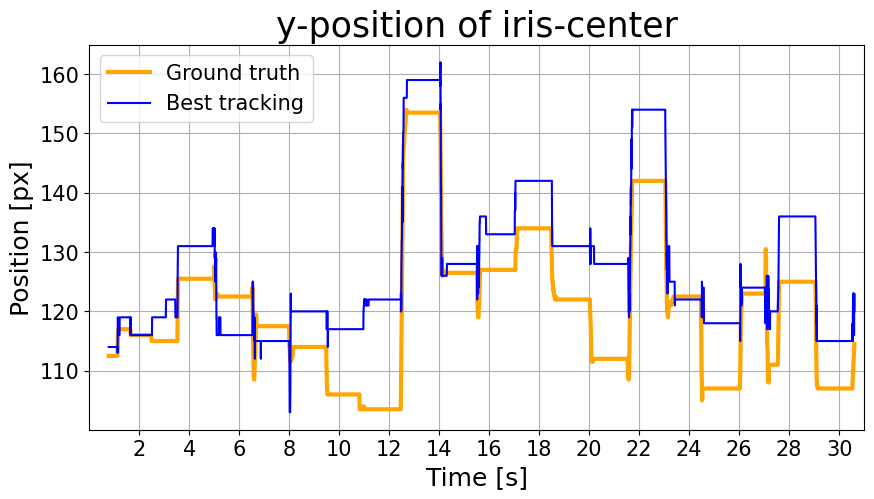

In [276]:
start = math.floor(center[:,0].min())
end = math.ceil(center[:,0].max())

plt.figure(figsize=(10,5))

# plt.plot(best[:,0], best[:,6], 'b')
plt.plot(gt[:,0], gt_x, 'orange', linewidth =3)
plt.plot(df_center[0], temp_x, 'b')
plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(['Ground truth', 'Best tracking'], fontsize = 15)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Position [px]', fontsize = 18)
plt.title('y-position of iris-center', fontsize = 25)


if (save == True):
    plt.savefig("/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/{vers}/figures/y_{usernum}_{eye}".format(usernum = user, eye = eyenum, vers = version) + formtype)

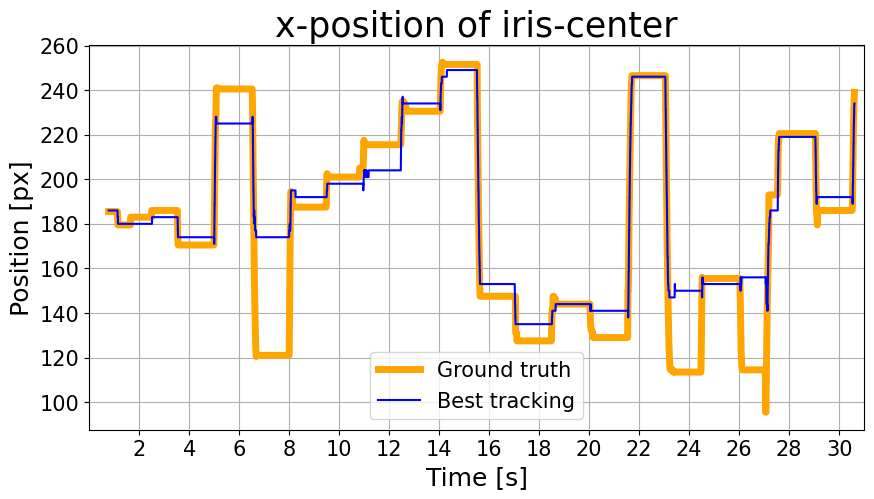

In [277]:
plt.figure(figsize=(10,5))
plt.plot(gt[:,0], gt_y, 'orange', linewidth =5)
# plt.plot(best[:,0], best[:,7], 'b')
plt.plot(df_center[0], temp_y, 'b')
plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(['Ground truth', 'Best tracking'], fontsize = 15)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Position [px]', fontsize = 18)
plt.title('x-position of iris-center', fontsize = 25)

if (save == True):
    plt.savefig("/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/{vers}/figures/x_{usernum}_{eye}".format(usernum = user, eye = eyenum, vers = version) + formtype)

BOUNDING BOX CALCULATION

In [433]:
f = interpolate.interp1d(gt[:,0], gt, kind = "nearest", axis = 0, fill_value="extrapolate")
gt_int = f(center[:,0])

In [80]:
x_left = np.maximum(gt_int[:,1], center[:,1])
y_top = np.maximum(gt_int[:,2], center[:,2])
x_right = np.minimum(gt_int[:,3], center[:,3])
y_bottom = np.minimum(gt_int[:,4], center[:,4])

In [81]:
intersection_area = (x_right - x_left) * (y_bottom - y_top)
gt_area = (gt_int[:,3]-gt_int[:,1])*(gt_int[:,4]-gt_int[:,2])

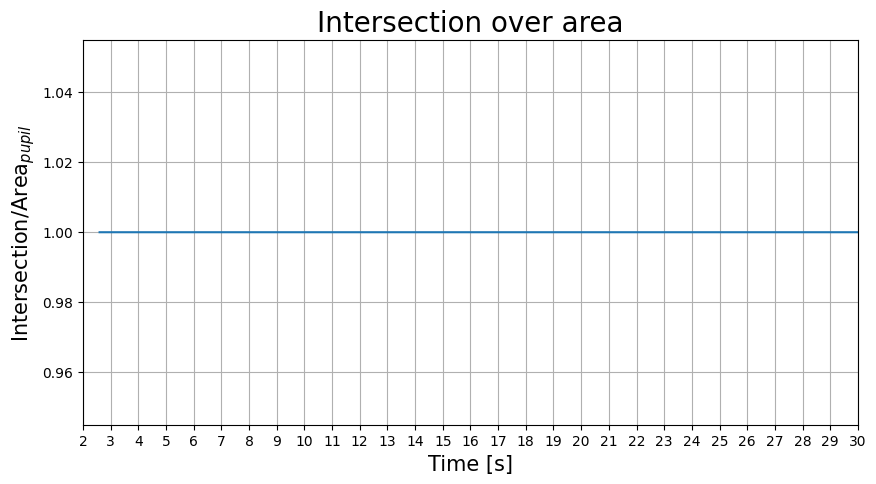

In [82]:
plt.figure(figsize=(10,5))
plt.plot(center[:,0],intersection_area/gt_area)
plt.xlim(start, end)
plt.xticks(np.linspace(start, end, end-start+1));
plt.grid(True)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Intersection/Area' + '$_{pupil}$', fontsize = 15)
plt.title('Intersection over area', fontsize = 20)

if (save == True):
    plt.savefig("/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/{vers}/figures/bb_{usernum}_{eye}".format(usernum = user, eye = eyenum, vers = version) + formtype)

ERROR CALCULATION

In [83]:
gt_center_x = (gt_int[:,1]+gt_int[:,3])/2
gt_center_y = (gt_int[:,2]+gt_int[:,4])/2

In [84]:
f_rob = interpolate.interp1d(center_roberta[:,0], center_roberta, kind = "nearest", axis = 0, fill_value="extrapolate")
rob = f_rob(center[:,0])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


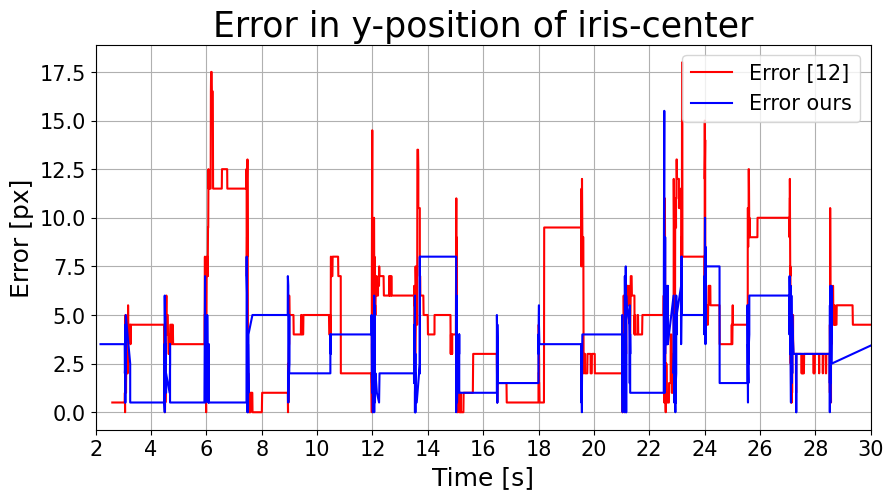

In [91]:
score = False 

plt.figure(figsize=(10,5))
plt.plot(rob[:,0], abs(gt_center_x - rob[:,2]), 'r')
plt.plot(gt_int[:,0], abs(gt_center_x-temp_x), 'b')


if (score == True):
    plt.plot(center[:,0], center[:,8])
    plt.plot([0, 30], [7, 7])
    plt.legend(['tracking error', 'error [roberta]', 'score', 'potential threshold'])
else: 
    plt.legend(['Error [12]', 'Error ours'], fontsize = 15, loc = 1)

plt.grid(True)
plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Error [px]', fontsize = 18)
plt.title('Error in y-position of iris-center', fontsize = 25)


if (save == True):
    plt.savefig("/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/{vers}/figures/errory_{usernum}_{eye}".format(usernum = user, eye = eyenum, vers = version) + formtype)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


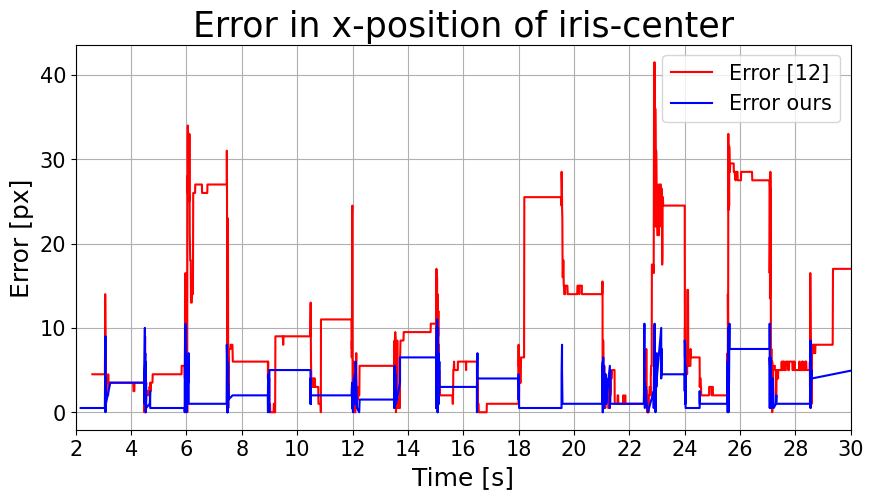

In [92]:
plt.figure(figsize=(10,5))
plt.plot(rob[:,0], abs(gt_center_y - rob[:,1]),'r')
plt.plot(gt_int[:,0], abs(gt_center_y-temp_y),'b')


if (score == True):
    plt.plot(center[:,0], center[:,8])
    plt.plot([0, 30], [7, 7])
    plt.legend(['tracking error', 'roberta error', 'score', 'potential threshold'])
else: 
    plt.legend(['Error [12]','Error ours'], fontsize = 15)

plt.grid(True)
plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Error [px]', fontsize = 18)
plt.title('Error in x-position of iris-center', fontsize = 25)

if (save == True):
    plt.savefig("/home/yvullers/Documents/Yvonne/CenterData/User{usernum}/{eye}/{vers}/figures/errorx_{usernum}_{eye}".format(usernum = user, eye = eyenum, vers = version) + formtype)

ERROR CALCULATION

In [113]:
errorx = abs(gt_center_x - temp_x).mean()
errory = (abs(gt_center_y - temp_y)).mean()

errorx_rob = abs(gt_center_x - rob[:,2]).mean()
errory_rob = abs(gt_center_y - rob[:,1]).mean()

errorx, errory

(3.0221898660454283, 2.6324985439720443)

In [100]:
string = str(user) + " " + str(errorx) + " " + str(errory) + " " + str(errorx_rob) + " " + str(errory_rob) + "\n"

if(save == True):
    f_error.write(string)
f_error.close()

TIMING

In [53]:
total_time = center[:,8].sum()
n = len(center[:,8])
av_time = total_time/n
av_freq = 1/(av_time*1e-6)

av_freq

506.09554800980953

In [54]:
string_f = str(user) + " " + str(av_freq) + "\n"

if(save == True):
    f_time.write(string_f)
f_time.close()

DIFFERENT GAUSSIAN KERNELS

In [121]:
filecc = "/home/yvullers/Documents/Yvonne/CenterData/User5/0/eros_cut_cut/center_5_0.csv"
filecf = "/home/yvullers/Documents/Yvonne/CenterData/User5/0/eros_cut_full/center_5_0.csv"
filefc = "/home/yvullers/Documents/Yvonne/CenterData/User5/0/eros_full_cut/center_5_0.csv"
fileff = "/home/yvullers/Documents/Yvonne/CenterData/User5/0/eros_full_full/center_5_0.csv"
ground_truth = "/home/yvullers/Documents/Yvonne/CenterData/User5/0/ground_truth_5_0.csv"

df_cc = pandas.read_csv(filecc, sep='\s+', header=None)
df_cf = pandas.read_csv(filecf, sep='\s+', header=None)
df_fc = pandas.read_csv(filefc, sep='\s+', header=None)
df_ff = pandas.read_csv(fileff, sep='\s+', header=None)
df_gt = pandas.read_csv(ground_truth, sep='\s+', header=None)

cc = df_cc.to_numpy()
cf = df_cf.to_numpy()
fc = df_fc.to_numpy()
ff = df_ff.to_numpy()
gt = df_gt.to_numpy()

In [122]:
gt_x = (gt[:,1]+gt[:,3])/2
gt_y = (gt[:,2]+gt[:,4])/2

In [123]:
cc_x = (cc[:,6])
cc_y = (cc[:,7])

cf_x = (cf[:,6])
cf_y = (cf[:,7])

fc_x = (fc[:,6])
fc_y = (fc[:,7])

ff_x = (ff[:,6])
ff_y = (ff[:,7])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


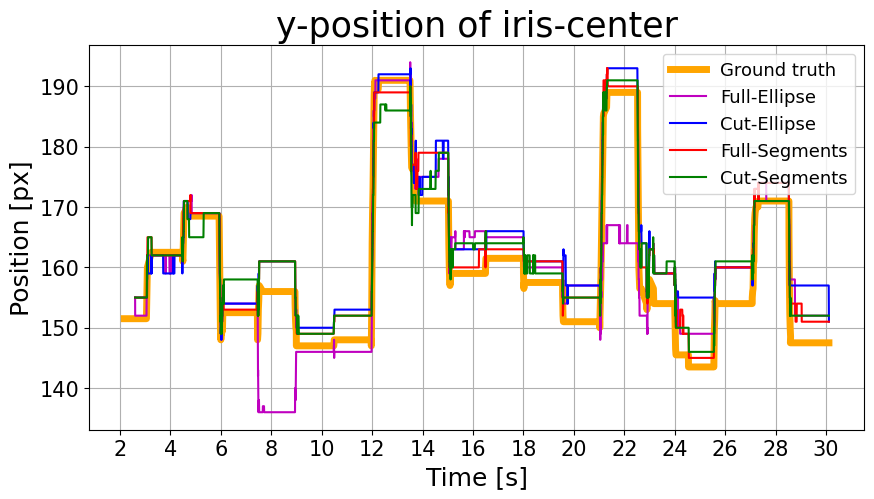

In [125]:
plt.figure(figsize=(10,5))
plt.plot(gt[:,0], gt_x, linewidth = 5, color = 'orange')
plt.plot(ff[:,0], ff_x, 'm')
plt.plot(cf[:,0], cf_x, 'b')
plt.plot(fc[:,0], fc_x, 'r')
plt.plot(cc[:,0], cc_x, 'g')

# plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(['Ground truth', 'Full-Ellipse', 'Cut-Ellipse', 'Full-Segments',  'Cut-Segments' ], fontsize = 13, loc = 1)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Position [px]', fontsize = 18)
plt.title('y-position of iris-center', fontsize = 25)

plt.savefig("/home/yvullers/Documents/Yvonne/ablation_y.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


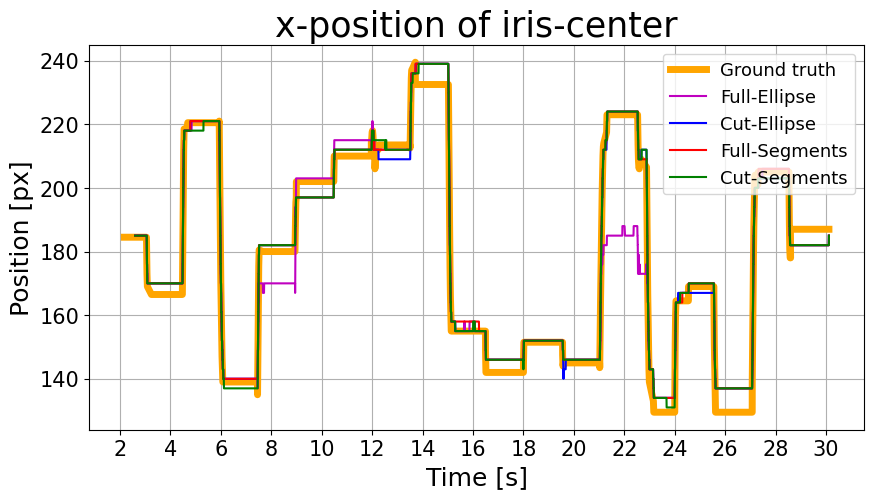

In [126]:
plt.figure(figsize=(10,5))
plt.plot(gt[:,0], gt_y, linewidth = 5, color = 'orange')
plt.plot(ff[:,0], ff_y, 'm')
plt.plot(cf[:,0], cf_y, 'b')
plt.plot(fc[:,0], fc_y, 'r')
plt.plot(cc[:,0], cc_y, 'g')
# plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(['Ground truth', 'Full-Ellipse', 'Cut-Ellipse', 'Full-Segments',  'Cut-Segments' ], fontsize = 13, loc = 1)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Position [px]', fontsize = 18)
plt.title('x-position of iris-center', fontsize = 25)
plt.savefig("/home/yvullers/Documents/Yvonne/ablation_x.eps")

In [15]:
f = interpolate.interp1d(gt[:,0], gt, kind = "nearest", axis = 0, fill_value="extrapolate")
gt_int_cc = f(cc[:,0])

gt_int_fc = f(fc[:,0])

gt_int_cf = f(cf[:,0])

gt_int_ff = f(ff[:,0])

In [17]:
gt_center_x_cc = (gt_int_cc[:,1]+gt_int_cc[:,3])/2
gt_center_y_cc = (gt_int_cc[:,2]+gt_int_cc[:,4])/2

gt_center_x_cf = (gt_int_cf[:,1]+gt_int_cf[:,3])/2
gt_center_y_cf = (gt_int_cf[:,2]+gt_int_cf[:,4])/2

gt_center_x_fc = (gt_int_fc[:,1]+gt_int_fc[:,3])/2
gt_center_y_fc = (gt_int_fc[:,2]+gt_int_fc[:,4])/2

gt_center_x_ff = (gt_int_ff[:,1]+gt_int_ff[:,3])/2
gt_center_y_ff = (gt_int_ff[:,2]+gt_int_ff[:,4])/2

Text(0.5, 1.0, 'y-position of iris-center')

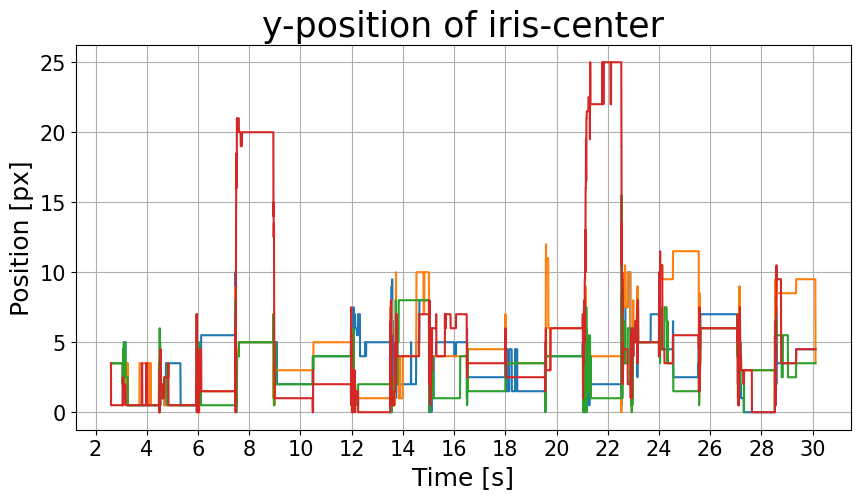

In [19]:
plt.figure(figsize=(10,5))
plt.plot(cc[:,0], abs(cc_x-gt_center_x_cc))
plt.plot(cf[:,0], abs(cf_x-gt_center_x_cf))
plt.plot(fc[:,0], abs(fc_x-gt_center_x_fc))
plt.plot(ff[:,0], abs(ff_x-gt_center_x_ff))
# plt.xlim(start, end)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], fontsize = 15) #np.linspace(start, end, end-start+1));
plt.yticks(fontsize = 15)
plt.grid(True)
# plt.legend(['gt','cc', 'cf', 'fc', 'ff'], fontsize = 15)
plt.xlabel('Time [s]', fontsize = 18)
plt.ylabel('Position [px]', fontsize = 18)
plt.title('error y-position of iris-center', fontsize = 25)

(0.0, 25.0)

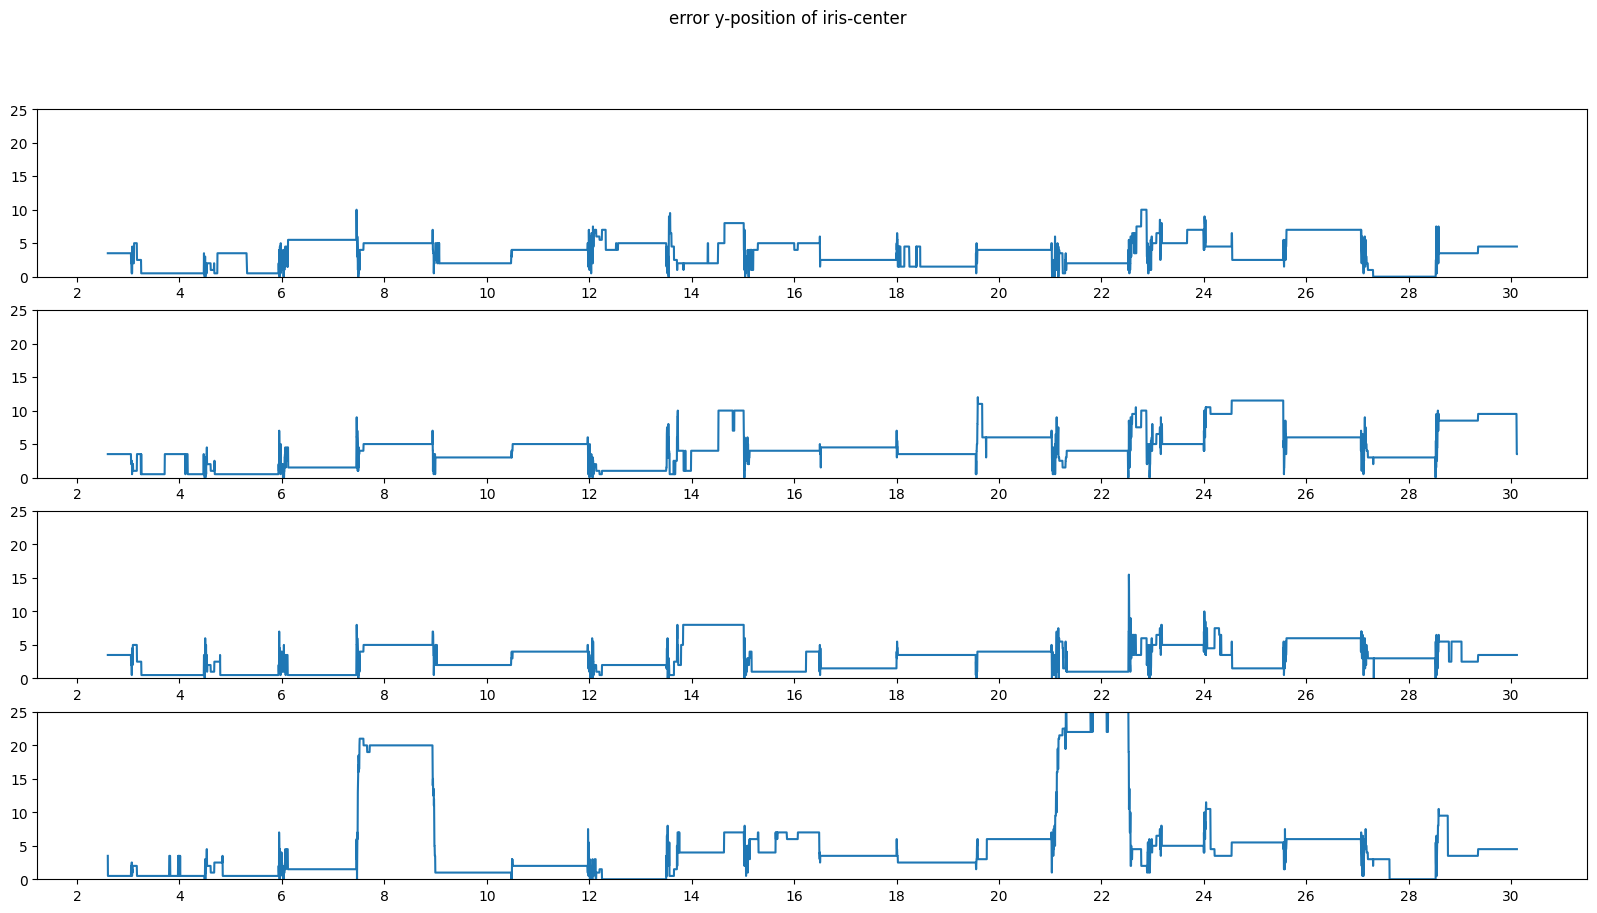

In [57]:
fig, axs = plt.subplots(4, figsize = (20,10))
fig.suptitle('error y-position of iris-center')
axs[0].plot(cc[:,0], abs(cc_x-gt_center_x_cc))
axs[1].plot(cf[:,0], abs(cf_x-gt_center_x_cf))
axs[2].plot(fc[:,0], abs(fc_x-gt_center_x_fc))
axs[3].plot(ff[:,0], abs(ff_x-gt_center_x_ff))
axs[0].set_xticks(ticks = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]) #np.linspace(start, end, end-start+1));
axs[0].set_ylim((0,25))
axs[1].set_xticks(ticks = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]) #np.linspace(start, end, end-start+1));
axs[1].set_ylim((0,25))
axs[2].set_xticks(ticks = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]) #np.linspace(start, end, end-start+1));
axs[2].set_ylim((0,25))
axs[3].set_xticks(ticks = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]) #np.linspace(start, end, end-start+1));
axs[3].set_ylim((0,25))